## Technical TASK 2 :- Prediction using UnSupervised ML

In this task, we are going to predict the optimum number of clusters from the given iris dataset and represent it visually. This includes unsupervised learning.
Task Completed for The Sparks Foundation Internship Program
Data Science & Business Analytics Internship Task_2
# Author: Manan Jain
Step 0: Importing Libraries needed to perform task

In [50]:
import pandas as pd
import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt


## Step 1: Reading the dataset

In [51]:
# loading avialabe dataset
iris_df = pd.read_csv('iris.csv')
print('data imported successfully')
iris_df.head()
iris_df.tail()

data imported successfully


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


checking for faults in our ~stars~ data

In [52]:
iris_df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

So there are no null values, therfore we can proceed with performing ml algorithm on our data.

In [53]:
# lets first describe our data
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [54]:
# Unique values in our data set
print(iris_df.Species.nunique())
print(iris_df.Species.value_counts())

3
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


##Visulizing our Data

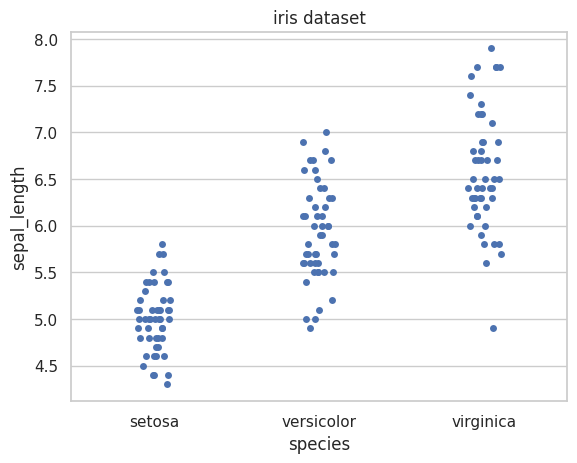

In [55]:
sns.set(style='whitegrid')
iris = sns.load_dataset('iris')
ax = sns.stripplot(x='species', y= 'sepal_length', data=iris)
plt.title('iris dataset')
plt.show()

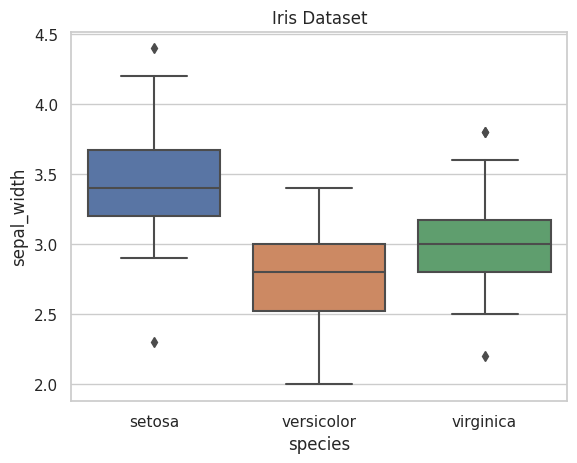

In [56]:
sns.boxplot(x='species', y='sepal_width', data=iris)
plt.title('Iris Dataset')
plt.show()

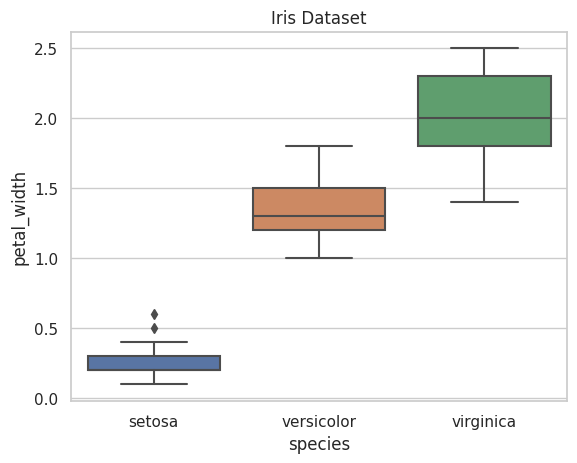

In [57]:
sns.boxplot(x='species', y='petal_width', data=iris)
plt.title('Iris Dataset')
plt.show()

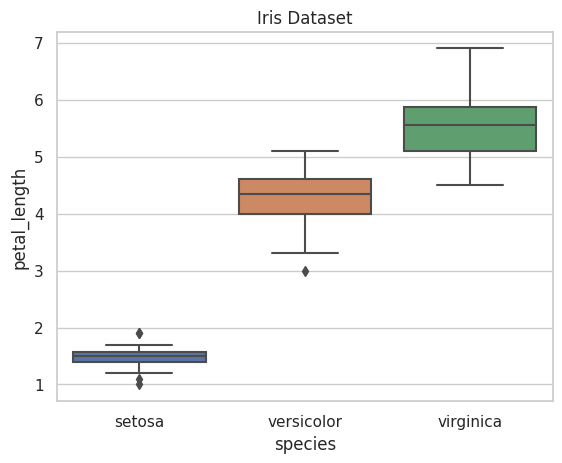

In [58]:
sns.boxplot(x='species', y='petal_length', data=iris)
plt.title('Iris Dataset')
plt.show()

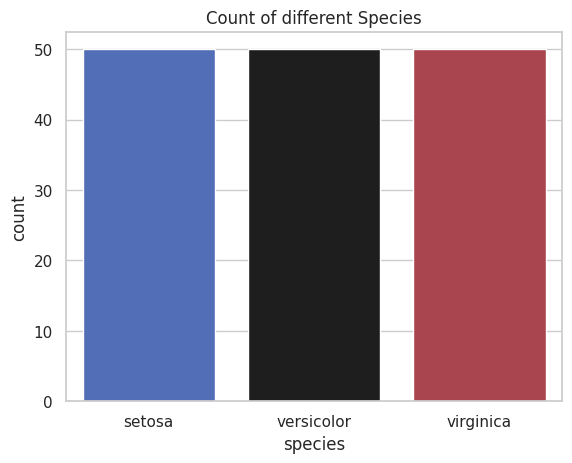

In [59]:
sns.countplot(x='species', data=iris, palette='icefire')
plt.title('Count of different Species')
plt.show()

<ipython-input-60-893428c57bdc>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(iris_df.corr(), annot=True, cmap='icefire')


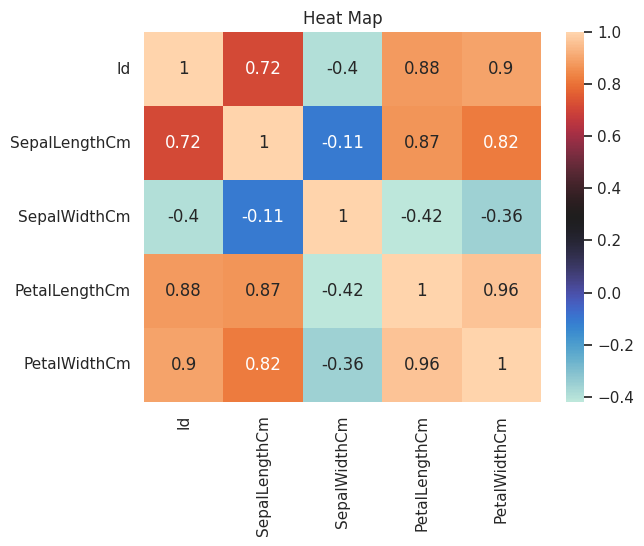

In [60]:
sns.heatmap(iris_df.corr(), annot=True, cmap='icefire')
plt.title('Heat Map')
plt.show()

<ipython-input-61-eba71b95353f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  iris_corr = iris_df.corr() # finding Correlation between different datasets


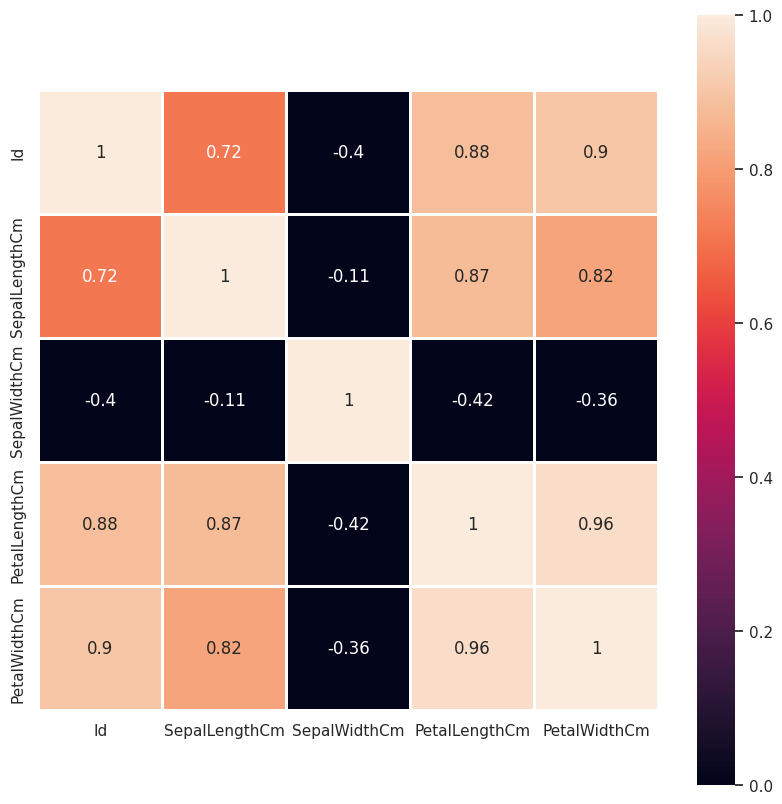

In [61]:
iris_corr = iris_df.corr() # finding Correlation between different datasets
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris_corr, vmin=0, vmax=1, square=True, annot=True, linewidth=1)
plt.show()


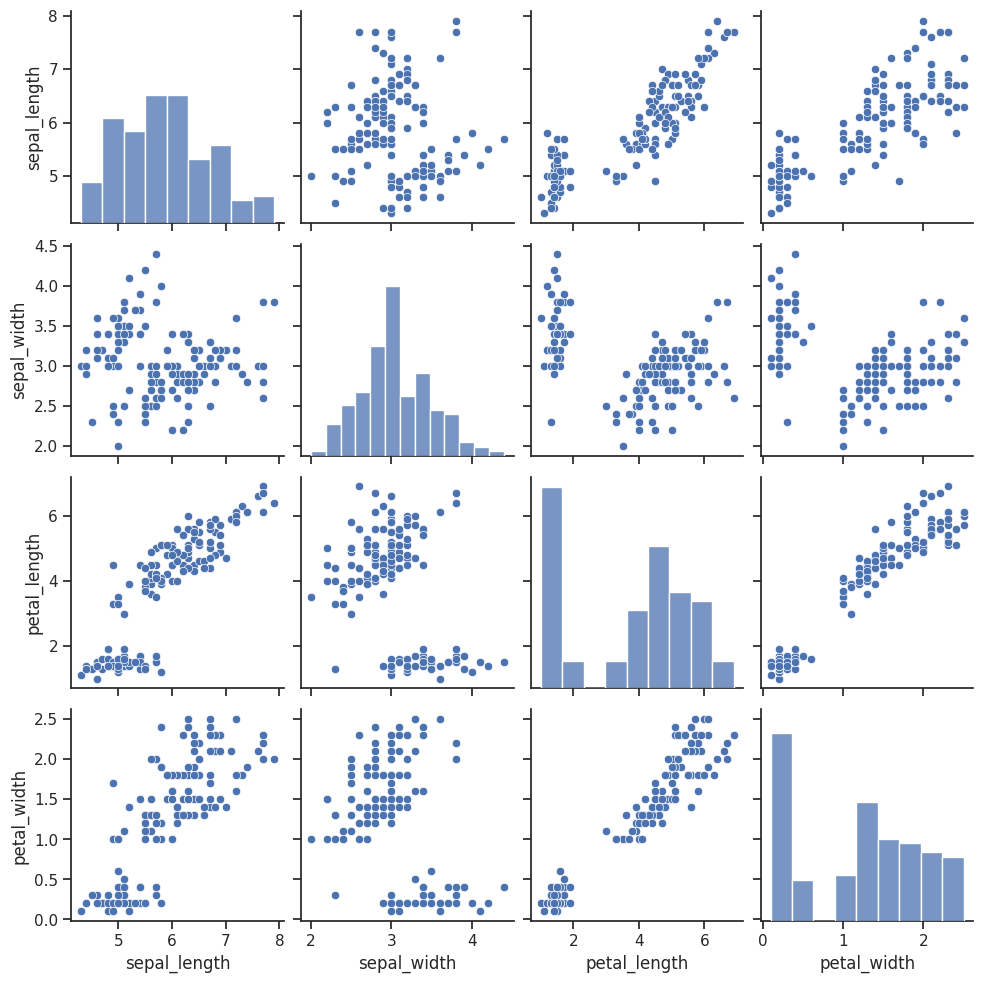

In [62]:
sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris)

plt.show()

## Finding optimum number of clusters using K-means clustring

In [63]:
# finding optimum number of clusters
x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(x)
  # appending the wcss to the list (kmeans.inertia_ returns the wcss value for an initialized state )
  wcss.append(kmeans.inertia_)
  print('k: ',i,  'wcss: ',kmeans.inertia_ )


k:  1 wcss:  281831.5446666667
k:  2 wcss:  70581.38080000003
k:  3 wcss:  31320.71120000001
k:  4 wcss:  17758.792503556186
k:  5 wcss:  11468.96874702381
k:  6 wcss:  7921.8634730769245
k:  7 wcss:  5911.632365518541
k:  8 wcss:  4541.979023391813
k:  9 wcss:  3571.9110955882347
k:  10 wcss:  2943.933100840336


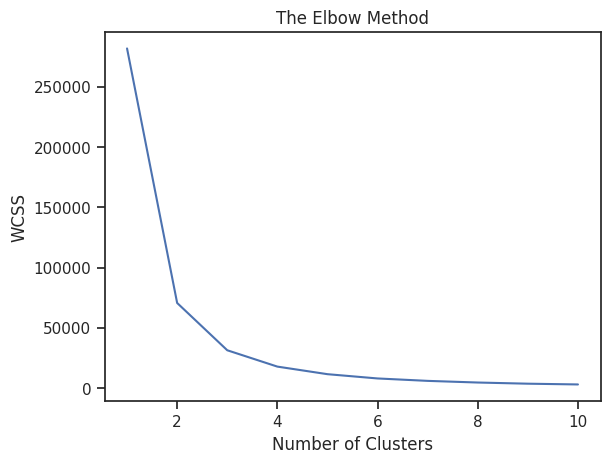

In [64]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Initializing K-Means with optimum numbers of clusters

In [65]:
# Fitting K-Means to the Dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)

# Returns a label for each data point based on the number of clusters
y_kmeans = kmeans.fit_predict(x)

In [66]:
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

# Visualizing clusters

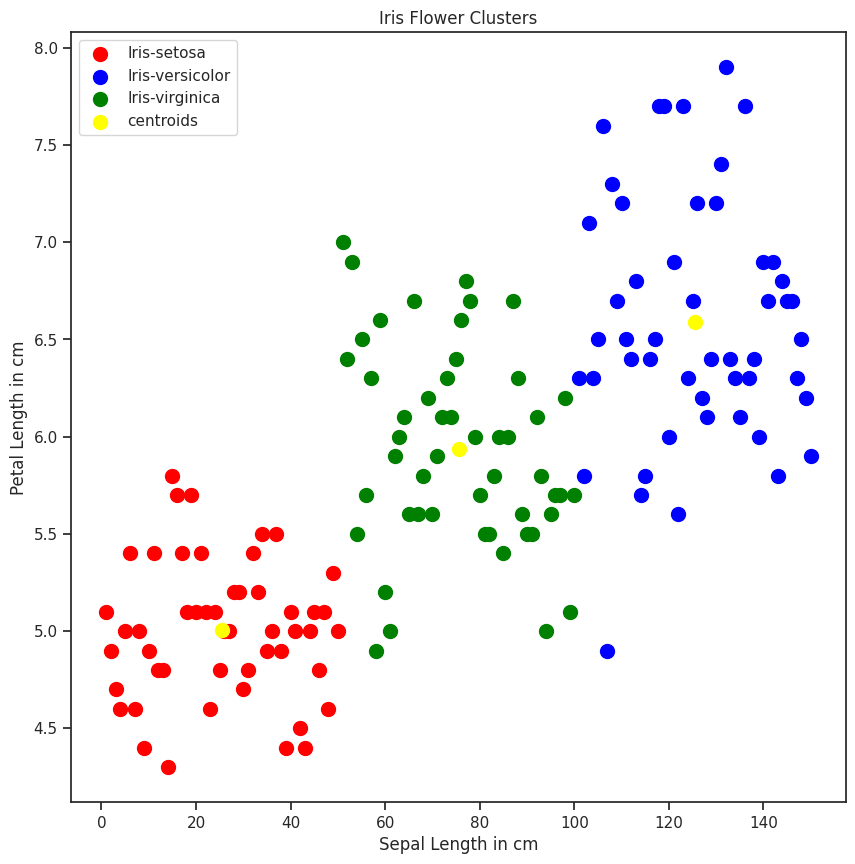

In [67]:
# visualizing clusters
plt.figure(figsize=(10,10))
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s=100, c='red', label='Iris-setosa')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s=100, c='blue', label='Iris-versicolor')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s=100, c='green', label='Iris-virginica')

# plotting the centroids of clusters
plt.scatter( kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='centroids')

plt.title('Iris Flower Clusters')
plt.xlabel('Sepal Length in cm')
plt.ylabel('Petal Length in cm')
plt.legend()
plt.show()